In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


Couple of important observations:
1. **EmployeeCount**: All values are 1
2. **StandardHours**: All values are 80

These columns have no relavant information for our purpose. So we can drop these feature columns from the dataset.

# Step 1: Perform EDA 

In [ ]:
print("The dimensions of the data are:", df.shape[0], "rows and", df.shape[1], "columns") # Displaying the dimensions of the dataset
print("Insights: This indicates that the dataset has", df.shape[0], "datapoints and", df.shape[1], "features.")

print(df.info()) # Gives the datatype of values in each column

In [ ]:
print(df.isnull().any()) # returns True if there are any null values in the dataset wrt a specific feature, else returns False

In [ ]:

print(df.iloc[0]) # Displays the values of the first row of the dataset

Insights: 
1. There are no null values in any of the datapoints.
2. The dataset is rich in the number of features per datapoint, giving us vital information about the employees


In [8]:
num_col = list(df.describe().columns) # includes columns with numeric data only; "df.columns" gives all the columns in the dataset
to_remove = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
col_numerical = [col for col in num_col if col not in to_remove] # includes only relavant columns with numeric data
col_categorical = list(set(df.columns).difference(num_col)) # includes columns with non-numeric data

In [9]:
print("Total number of numerical columns:", len(num_col))
print("Total number of relavent numerical columns: ", len(col_numerical))
print("Total number of categorical columns: ", len(col_categorical))

Total number of numerical columns: 26
Total number of relavent numerical columns:  23
Total number of categorical columns:  9


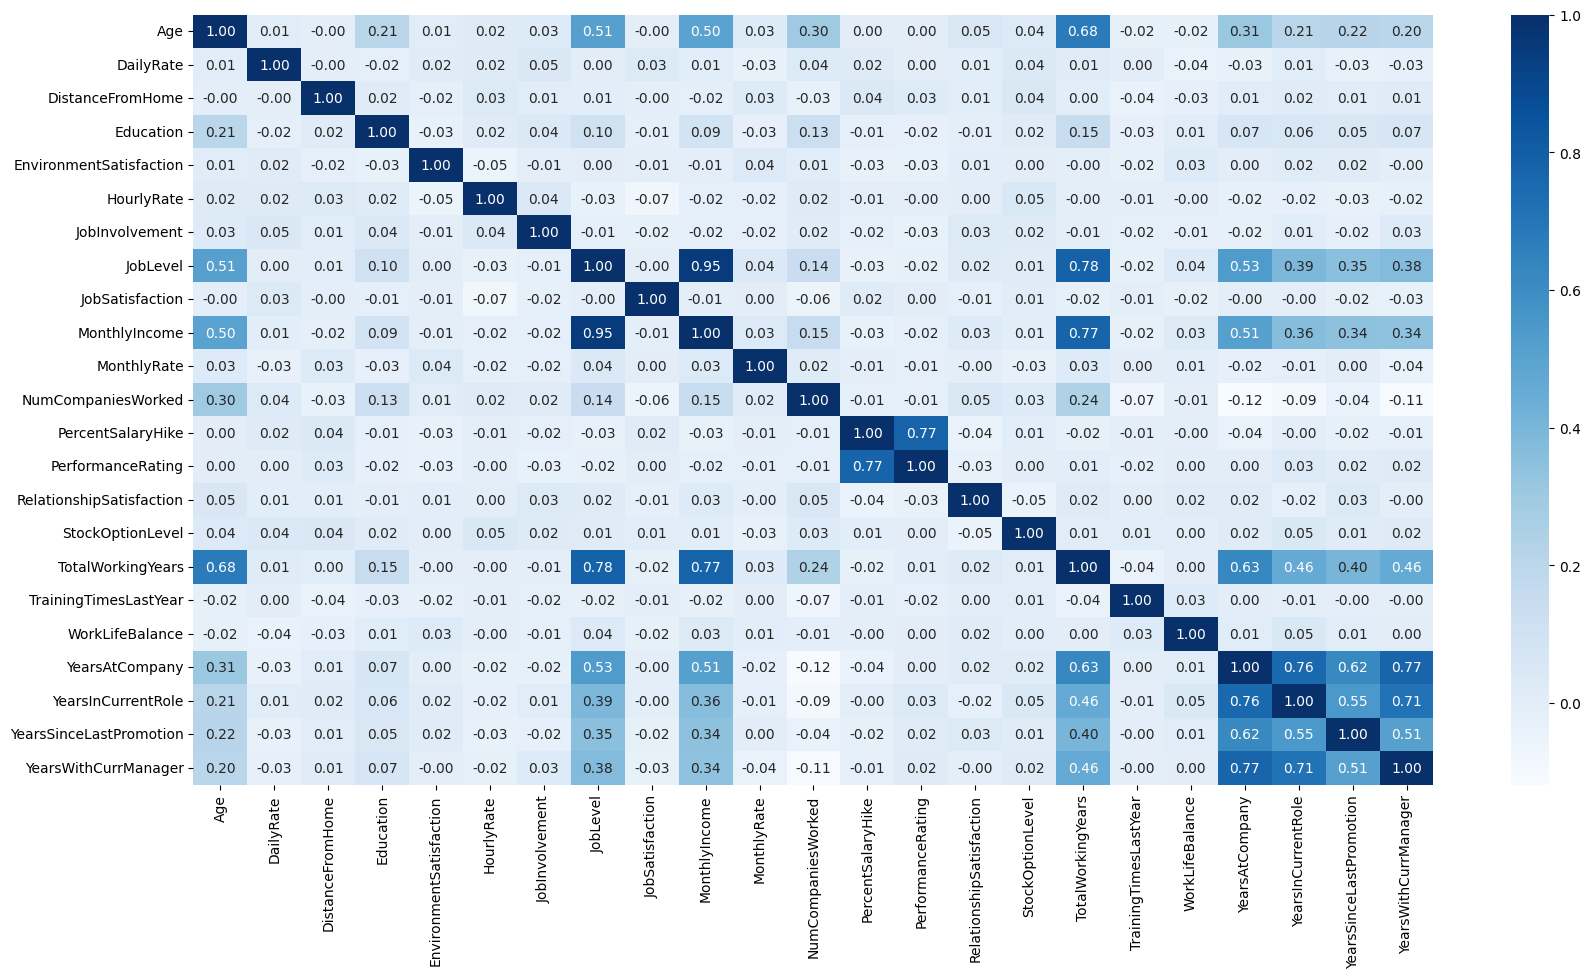

In [10]:
df[col_numerical].corr()
plt.figure(figsize=(20,10))
sns.heatmap(df[col_numerical].corr(), annot=True,cmap="Blues", fmt=".2f");

Here, we mask the upper half of the correlation matrix since the same data is replicated twice.

<Axes: >

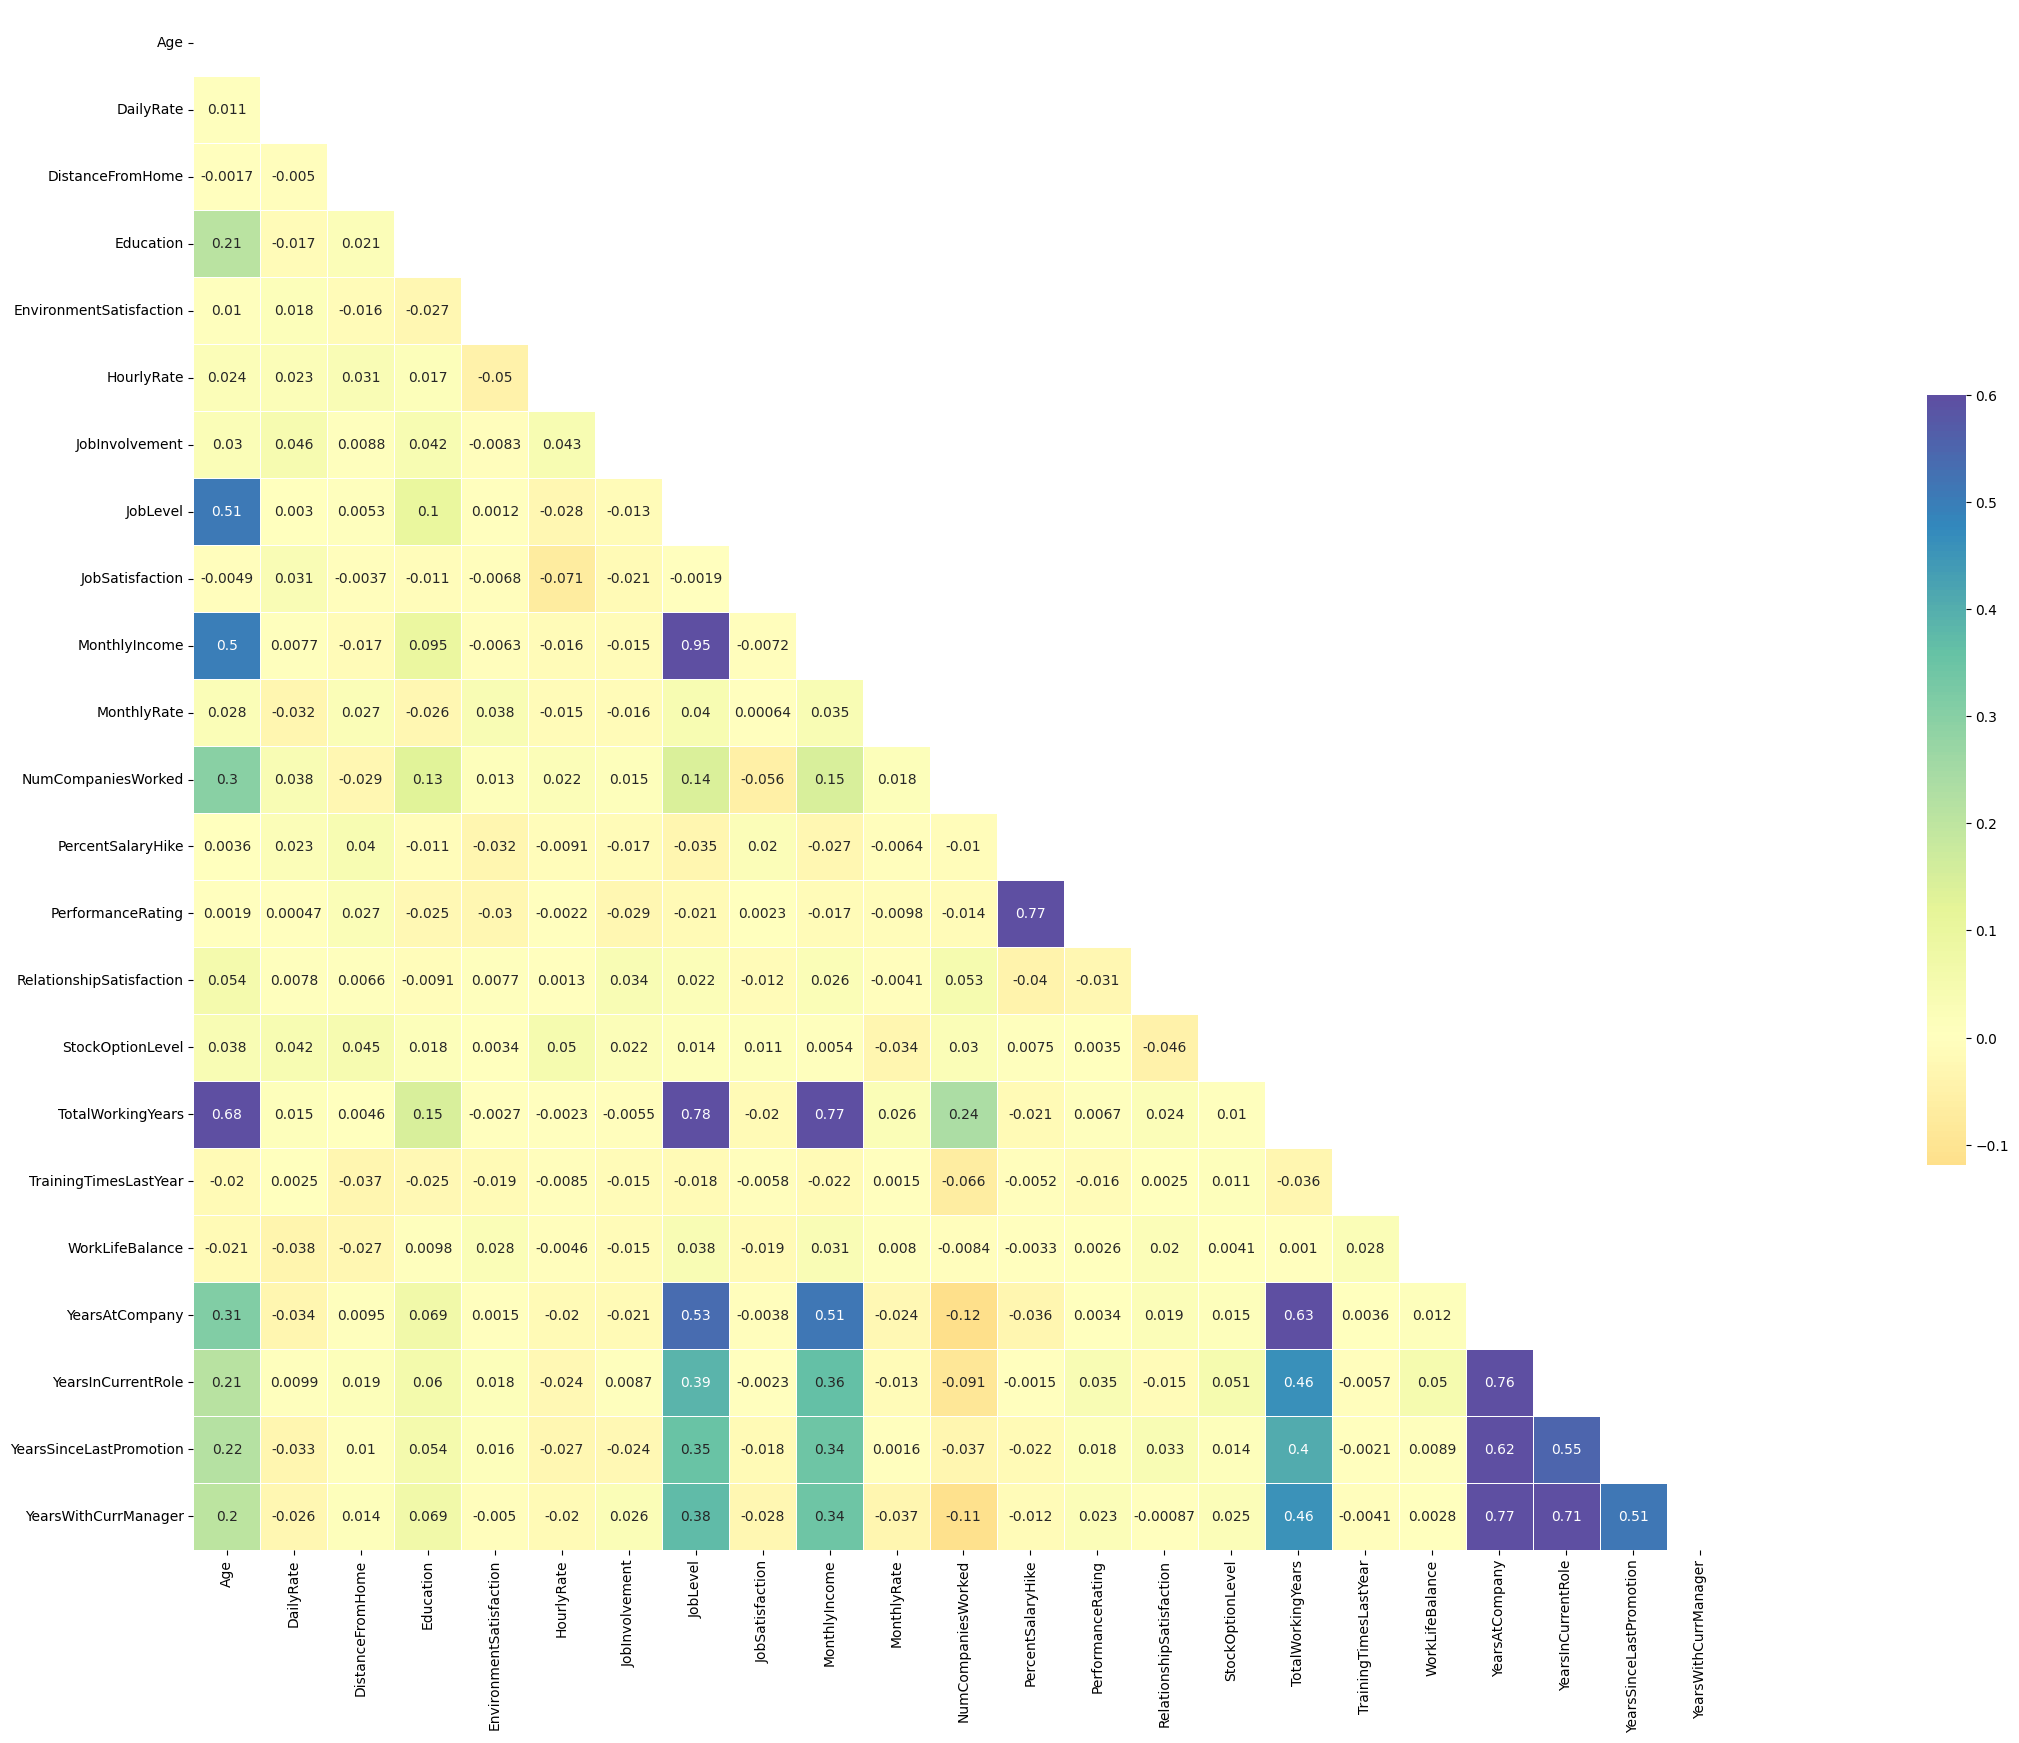

In [18]:
plt.figure(figsize=(50,20))
mask = np.zeros_like(df[col_numerical].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df[col_numerical].corr(),  annot=True,mask=mask,cmap='Spectral',vmax=0.6,  square=True,center=0, linewidths=0.5, cbar_kws={'shrink': 0.5})

Insights: 
1. There is strong positive correlation between **Monthly Income** and **Job Level**.
2. Any features having a correlation feature >= 0.7 can be considered to have significantly high correlation.

## One-hot encoding

In [20]:
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

* One-hot encoding is used to convert non-binary data values to binary data.
* This helps the ML algorithm (Decision Tree in our case) to classify the data smoothly.

In [38]:
df_cat = pd.get_dummies(df[col_categorical]).astype(int)
df_cat.head()

,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Over18_Y,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male
0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0
1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1


In [ ]:
X = pd.concat([df[col_numerical], df_cat], axis=1) # Combining numerical features and the encoded features
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Over18_Y,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1


In [42]:
y = df["Attrition_num"]
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Attrition_num, dtype: int64

# Decision Tree Classifier Implementation

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [44]:
classifier = DecisionTreeClassifier(random_state=0)

After fitting the data, we check the performance metrics for the training and test data respectively.

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_train, classifier.predict(X_train))

1.0

In [47]:
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [48]:
confusion_matrix(y_train, classifier.predict(X_train))

array([[204,   0],
       [  0, 972]], dtype=int64)

Now, we calculate metrics for the test data

In [49]:
accuracy_score(y_test, classifier.predict(X_test))

0.8027210884353742

In [50]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.28      0.48      0.36        33
           1       0.93      0.84      0.88       261

    accuracy                           0.80       294
   macro avg       0.60      0.66      0.62       294
weighted avg       0.86      0.80      0.82       294



In [51]:
confusion_matrix(y_test, classifier.predict(X_test))

array([[ 16,  17],
       [ 41, 220]], dtype=int64)

Insights:
1. **Class Imbalance**:
There are far more examples of class 1 than class 0 in the test set. The model is biased toward predicting class 1.
2. **Overfitting**:
Perfect training scores and much lower test scores indicate overfitting.

Possible solution to overcome the challenges:

Random Forests or Gradient Boosted Trees often generalize better and handle imbalance more robustly.